
# Prediction with a pre-trained model 

In [9]:
import math
import skimage
import numpy as np
import os
import matplotlib.pyplot as plt

import tensorflow as tf
#from keras import backend
from keras.layers import *
from keras.models import load_model
#from skimage.measure import compare_psnr
from skimage.metrics import peak_signal_noise_ratio
from unet3 import cross_entropy_balanced
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""

pngDir = './png/'
md = 70 #trained models at different epoch
model = load_model('model/fseg-'+str(md)+'.hdf5',
        custom_objects={'cross_entropy_balanced': cross_entropy_balanced})


1/1 [==============================] - 2s 2s/step


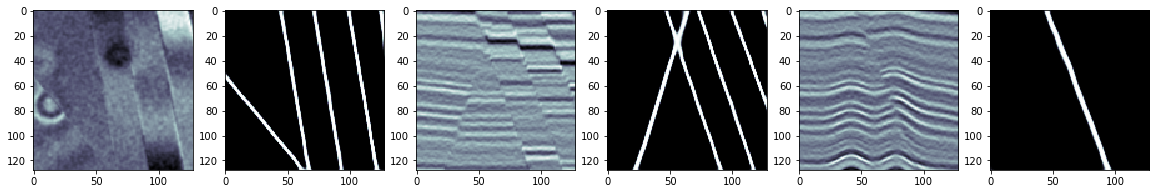

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
seismPath = "./data/validation/seis/"
faultPath = "./data/validation/fault/"
n1,n2,n3 = 128,128,128
dk = 2
gx = np.fromfile(seismPath+str(dk)+'.dat',dtype=np.single)
fx = np.fromfile(faultPath+str(dk)+'.dat',dtype=np.single)
gx = np.reshape(gx,(n1,n2,n3))
fx = np.reshape(fx,(n1,n2,n3))
gm = np.mean(gx)
gs = np.std(gx)
gx = gx-gm
gx = gx/gs
gx = np.transpose(gx)
fx = np.transpose(fx)
fp = model.predict(np.reshape(gx,(1,n1,n2,n3,1)),verbose=1)
fp = fp[0,:,:,:,0]
fig = plt.figure(figsize=(20,20))
#time slice
k1 = 50
plt.subplot(1, 6, 1)
imgplot1 = plt.imshow(gx[k1,:,:],cmap=plt.cm.bone,interpolation='nearest',aspect=1)
plt.subplot(1, 6, 2)
imgplot2 = plt.imshow(fp[k1,:,:],cmap=plt.cm.bone,interpolation='nearest',aspect=1)
#inline slice
k2 = 110
plt.subplot(1, 6, 3)
imgplot1 = plt.imshow(gx[:,k2,:],cmap=plt.cm.bone,interpolation='nearest',aspect=1)
plt.subplot(1, 6, 4)
imgplot2 = plt.imshow(fp[:,k2,:],cmap=plt.cm.bone,interpolation='nearest',aspect=1)

#xline slice
k3 = 10
plt.subplot(1, 6, 5)
imgplot1 = plt.imshow(gx[:,:,k3],cmap=plt.cm.bone,interpolation='nearest',aspect=1)
plt.subplot(1, 6, 6)
imgplot2 = plt.imshow(fp[:,:,k3],cmap=plt.cm.bone,interpolation='nearest',aspect=1)

 
## ======================================================================

## prediction test on a field seismic image extracted from

## the Netherlands off-shore F3 block seismic data

In [11]:
gx.shape

(128, 128, 128)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190])

In [27]:
def std(x):
    x = x - np.mean(x)
    return x/np.std(x)

def crop(x, delta):
    N = len(x)
    return x[N//2-delta:N//2+delta+1]

def stat_wav(tracs):
    # standarize so stuff has the same range of values
    return crop(np.correlate(std(tracs), std(tracs), mode='full'), 20)
    

freq peak: 37.49 Hz
freq peak: 32.85 Hz
freq peak: 35.40 Hz
freq peak: 24.57 Hz
freq peak: 30.75 Hz
freq peak: 23.09 Hz
freq peak: 27.59 Hz
freq peak: 30.59 Hz
freq peak: 23.51 Hz
freq peak: 39.96 Hz
freq peak: 42.31 Hz
freq peak: 38.44 Hz
freq peak: 39.83 Hz
freq peak: 31.57 Hz
freq peak: 34.32 Hz
freq peak: 31.20 Hz
freq peak: 36.85 Hz
freq peak: 31.34 Hz
freq peak: 28.11 Hz
freq peak: 40.05 Hz
freq peak: 30.98 Hz
freq peak: 31.89 Hz
freq peak: 29.45 Hz
freq peak: 25.97 Hz
freq peak: 34.67 Hz
freq peak: 27.73 Hz
freq peak: 39.86 Hz
freq peak: 31.69 Hz
freq peak: 34.36 Hz
freq peak: 26.87 Hz
freq peak: 21.36 Hz
freq peak: 30.40 Hz
freq peak: 26.55 Hz
freq peak: 33.63 Hz
freq peak: 31.65 Hz
freq peak: 33.78 Hz
freq peak: 30.72 Hz
freq peak: 27.28 Hz
freq peak: 30.08 Hz
freq peak: 33.94 Hz
freq peak: 31.57 Hz
freq peak: 42.47 Hz
freq peak: 40.45 Hz
freq peak: 27.65 Hz
freq peak: 38.25 Hz
freq peak: 37.29 Hz
freq peak: 27.19 Hz
freq peak: 39.61 Hz
freq peak: 31.01 Hz
freq peak: 29.71 Hz


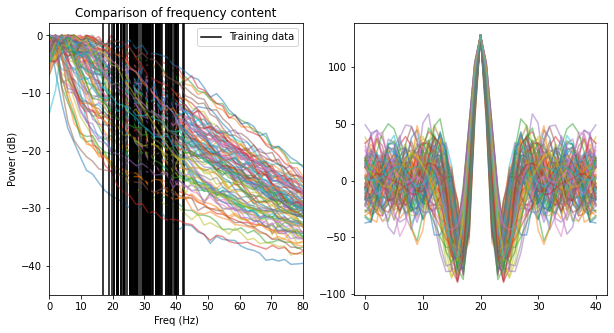

In [47]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

seismPath_train = "./data/train/seis/"

train_range = np.arange(0,200,2)
for i in train_range:

    n1,n2,n3 = 128,128,128
    dk = i
    gx = np.fromfile(seismPath_train+str(dk)+'.dat',dtype=np.single)
    #fx = np.fromfile(faultPath+str(dk)+'.dat',dtype=np.single)
    gx = np.reshape(gx,(n1,n2,n3))
    #fx = np.reshape(fx,(n1,n2,n3))
    gm = np.mean(gx)
    gs = np.std(gx)
    gx = gx-gm
    gx = gx/gs
    gx = np.transpose(gx)
    
    
    
    
    freqs_synth = np.fft.fftshift(np.fft.fftfreq(gx.shape[0], 0.004))
    synth_tracs = gx[:,:,10]
    
    freq,amp,db,fpeak = fullspec(synth_tracs,sr)
    ax1.axvline(fpeak, color='k', ls='-')
    
    y = np.zeros(gx.shape[0])
    for i in np.arange(gx.shape[2]):
        y += np.fft.fftshift(np.abs(np.fft.fft(synth_tracs[i,:])))
    y /= y.max()
    #plt.plot(freqs_real[len(x)//2:], 20*np.log10(x[len(x)//2:]))
    ax1.plot(freqs_synth[len(y)//2:], 20*np.log10(y[len(y)//2:]), alpha=0.5)
    ax1.legend(["Training data"])
    
    
    wavelet = stat_wav(synth_tracs[:,10])

    ax2.plot(wavelet, alpha=0.5)
    
    
ax1.set_xlabel("Freq (Hz)")
ax1.set_ylabel("Power (dB)")
ax1.set_title("Comparison of frequency content")
ax1.set_xlim([0,80])

plt.show()    
    #fx = np.transpose(fx)
    #fp = model.predict(np.reshape(gx,(1,n1,n2,n3,1)),verbose=1)
    #fp = fp[0,:,:,:,0]
    #fig = plt.figure(figsize=(20,20))

In [46]:
synth_tracs.shape

(128, 128)

In [39]:
def ampspec(signal,sr,smooth=False):
    '''
    ampspec (C) aadm 2016
    Calculates amplitude spectrum of a signal with FFT optionally smoothed via cubic interpolation.

    INPUT
    signal: 1D numpy array
    sr: sample rate in ms
    smooth: True or False

    OUTPUT
    freq: frequency
    amp: amplitude
    '''

    SIGNAL = np.fft.fft(signal)
    freq = np.fft.fftfreq(signal.size, d=sr*0.001)
    keep = freq>=0
    SIGNAL = np.abs(SIGNAL[keep])
    freq = freq[keep]
    if smooth:
        freq0=np.linspace(freq.min(),freq.max()/2,freq.size*10)
        f = interp1d(freq, SIGNAL, kind='cubic')
        return freq0, f(freq0)
    else:
        return freq, SIGNAL

def fullspec(data,sr):
    '''
    fullspec (C) aadm 2016-2018
    Calculates amplitude spectrum of 2D numpy array.

    INPUT
    data: 2D numpy array, shape=(traces, samples)
    sr: sample rate in ms

    OUTPUT
    freq: frequency
    amp: amplitude
    db: amplitude in dB scale
    f_peak: average peak frequency
    '''
    amps, peaks = [], []
    for i in range(data.shape[1]):
        trace = data[:,i]
        freq, amp = ampspec(trace,sr)
        peak = freq[np.argmax(amp)]
        amps.append(amp)
        peaks.append(peak)
    amp0 = np.mean(np.dstack(amps), axis=-1)
    amp0 = np.squeeze(amp0)
    db0 = 20 * np.log10(amp0)
    db0 = db0 - np.amax(db0)
    f_peak = np.mean(peaks)
    #print('freq peak: {:.2f} Hz'.format(f_peak))
    return freq,amp0,db0,f_peak

def plot_ampspec(freq,amp,f_peak,name=None):
    '''
    plot_ampspec (C) aadm 2016-2018
    Plots amplitude spectrum calculated with fullspec (aageofisica.py).

    INPUT
    freq: frequency
    amp: amplitude
    f_peak: average peak frequency
    '''
    db = 20 * np.log10(amp)
    db = db - np.amax(db)
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5),facecolor='w')
    ax[0].plot(freq, amp, '-k', lw=2)
    ax[0].set_ylabel('Power')
    ax[1].plot(freq, db, '-k', lw=2)
    ax[1].set_ylabel('Power (dB)')
    for aa in ax:
        aa.set_xlabel('Frequency (Hz)')
        aa.set_xlim([0,np.amax(freq)/1.5])
        aa.grid()
        aa.axvline(f_peak, color='r', ls='-')
        if name!=None:
            aa.set_title(name, fontsize=16)

def plot_ampspec2(freq1,amp1,f_peak1,freq2,amp2,f_peak2,name1=None,name2=None):
    '''
    plot_ampspec2 (C) aadm 2016-2018
    Plots overlay of 2 amplitude spectra calculated with fullspec.

    INPUT
    freq1, freq2: frequency
    amp1, amp2: amplitude spectra
    f_peak1, f_peak2: average peak frequency
    '''
    db1 = 20 * np.log10(amp1)
    db1 = db1 - np.amax(db1)
    db2 = 20 * np.log10(amp2)
    db2 = db2 - np.amax(db2)
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5),facecolor='w')
    if name1 is not None:
        label1='{:s} Fp={:.0f} Hz'.format(name1,f_peak1)
        label2='{:s} Fp={:.0f} Hz'.format(name2,f_peak2)
    else:
        label1='Fp={:.0f} Hz'.format(f_peak1)
        label2='Fp={:.0f} Hz'.format(f_peak2)
    ax[0].plot(freq1, amp1, '-k', lw=2, label=label1)
    ax[0].plot(freq2, amp2, '-r', lw=2, label=label2)
    ax[0].fill_between(freq1,0,amp1,lw=0, facecolor='k',alpha=0.25)
    ax[0].fill_between(freq2,0,amp2,lw=0, facecolor='r',alpha=0.25)
    ax[0].set_ylabel('Power')
    ax[1].plot(freq1, db1, '-k', lw=2, label=label1)
    ax[1].plot(freq2, db2, '-r', lw=2,label=label2)
    lower_limit=np.min(ax[1].get_ylim())
    ax[1].fill_between(freq1, db1, lower_limit, lw=0, facecolor='k', alpha=0.25)
    ax[1].fill_between(freq2, db2, lower_limit, lw=0, facecolor='r', alpha=0.25)
    ax[1].set_ylabel('Power (dB)')
    for aa in ax:
        aa.set_xlabel('Frequency (Hz)')
        aa.set_xlim([0,np.amax(freq)/1.5])
        aa.grid()
        aa.axvline(f_peak1, color='k', ls='-')
        aa.axvline(f_peak2, color='r', ls='-')
        aa.legend(fontsize='small')

freq peak: 5.45 Hz


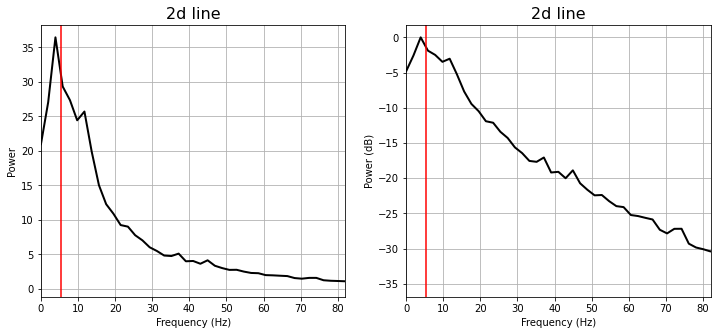

In [36]:
sr = 4
synth_tracs = gx[:,:,10]
freq,amp,db,fpeak = fullspec(synth_tracs,sr)
plot_ampspec(freq,amp,fpeak,name='2d line')